# Example of an unbinned maximum likelihood fit with iminuit

In [ ]:
!pip install iminuit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import iminuit as im
#import iminuit

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit,cost

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import UnbinnedNLL

# display iminuit version
print("iminuit version:", im.__version__)

from pprint import pprint

iminuit version: 2.30.1


In [ ]:
# Load the dataset
# x = np.loadtxt("data/data_ml_fit.txt")
xdata_points = np.loadtxt("https://www.physi.uni-heidelberg.de/~reygers/lectures/2020/smipp/data_ml_fit.txt")

In [ ]:
# The dataset has 1000 events
len(xdata_points)

1000

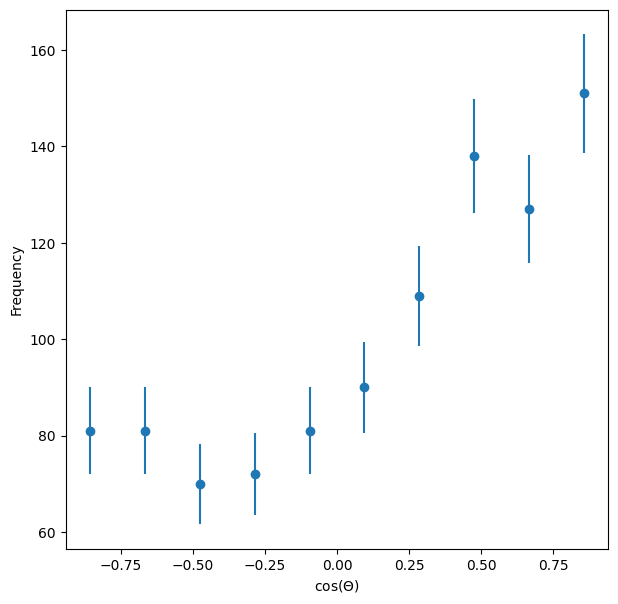

In [ ]:
from matplotlib import pyplot as pp

plt.figure(figsize=(7,7))

plt.xlabel("cos($\Theta$)")
plt.ylabel("Frequency")
plt.title = ('Scattering Angle Distribution ')


counts,bin_edges = np.histogram(xdata_points,10)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err = np.sqrt(counts)
pp.errorbar(bin_centres, counts, yerr=err, fmt='o')
pp.show()

Let's try with 2 dimensional likelihood method.
Here the parameters will be called a and b.

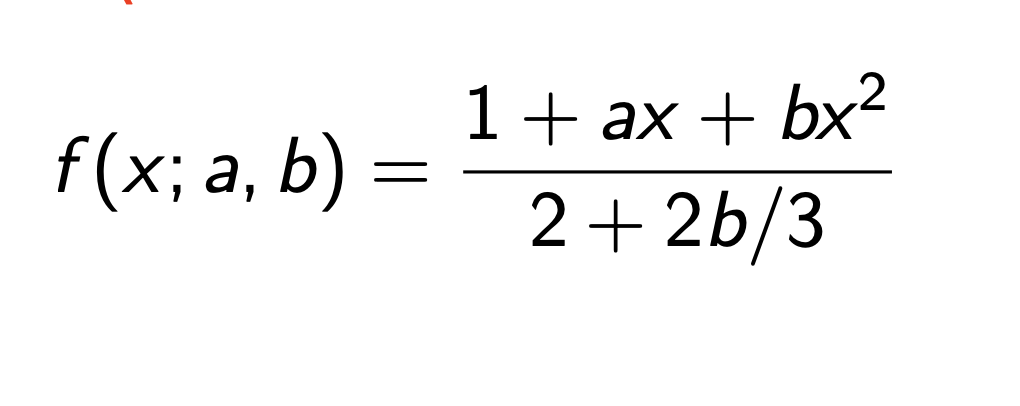

In [ ]:
# Define the fit function
def f(x, a, b):
    """normalized fit function"""
    xmin = -0.95
    xmax = 0.95
    return (6 * (1 + a * x + b * x * x)) / \
            ((xmax - xmin) * (3 * a * (xmax + xmin) + \
            2 * (3 + b * (xmax * xmax + xmax * xmin + xmin * xmin))))

In [ ]:
def negative_log_likelihood(a, b):
    """negative log likelihood function"""
    fmodel = f(xdata_points, a, b)
    return -np.sum(np.log(fmodel))

In [ ]:
#m = Minuit(negative_log_likelihood, a=1, b=1, errordef=Minuit.LIKELIHOOD)
m = Minuit(negative_log_likelihood, a = 1, b=1)
Minuit.errordef = Minuit.LIKELIHOOD

In [ ]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 606.5                      │              Nfcn = 50               │
│ EDM = 2.23e-08 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.53    │   0.11    │            │            │         │         │       │
│ 1 │ b    │   0.51    │   0.23    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────┐
│   │      a      b │
├───┼───────────────┤
│ a │ 0.0114  0.012 │
│ b │  0.012 0.0511 │
└───┴───────────────┘

In [ ]:
# Get fit valus for a nd b parmaters with errors
for p in m.parameters:
    print(f"{p} = {m.values[p]:.6f}" \
          f" +/- {m.errors[p]:.6f}")
# covariance matrix
print(m.covariance)

a = 0.530292 +/- 0.106861
b = 0.514868 +/- 0.225977
┌───┬───────────────┐
│   │      a      b │
├───┼───────────────┤
│ a │ 0.0114  0.012 │
│ b │  0.012 0.0511 │
└───┴───────────────┘


In [ ]:
# function with fitted parameters
xf = np.linspace(-1, 1., 1000)
a_fit = m.values[0]
b_fit = m.values[1]
yf = f(xf, a_fit, b_fit)

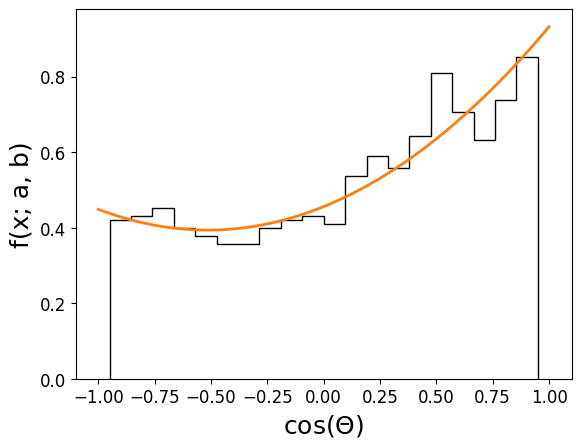

In [ ]:
plt.hist(x, bins=20, density=True, ec="black", histtype='step');
plt.plot(xf, yf, linewidth=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("cos($\Theta$)", fontsize=18)
plt.ylabel("f(x; a, b)", fontsize=18);
plt.savefig("ml_fit_example.pdf")

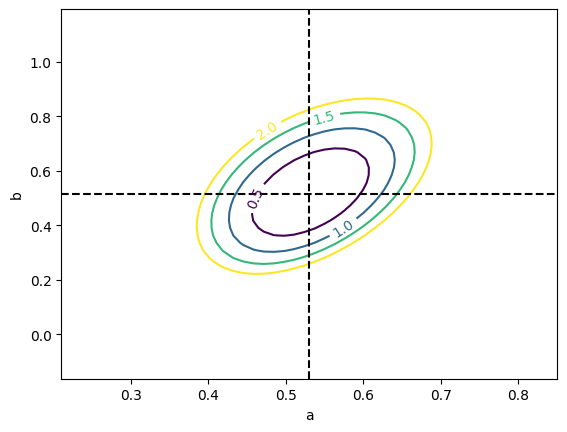

In [ ]:
m.draw_contour('a','b',bound=3);

In [ ]:
def get_error_ellipse(cov, center, nstd, **kwargs):
    """
    return error ellipse patch representing the covariance matrix
    cov: 2x2 covariance matrix
    centre: mean values (mu1, mu2)
    nstd: number of standard deviations
    """

    # eigenvalues and eigenvectors of the covariance matrix
    # (in ascending order of the eigenvalue)
    eigvals, eigvecs = np.linalg.eigh(cov)

    # x, y component of the eigenvector (eigvecs[:,1]) with the larger eigenvalue
    x, y = eigvecs[:,1][0], eigvecs[:,1][1]

    # angle of the ellipse
    theta = np.arctan2(y, x)

    # width = 2 times radius in x, height = 2 times radius in y
    height, width = 2 * nstd * np.sqrt(eigvals)

    return Ellipse(xy=center, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

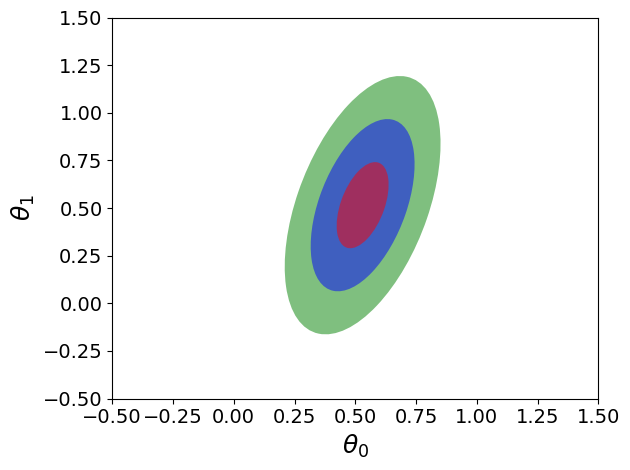

In [ ]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
el_1sigma = get_error_ellipse(m.covariance, (a_fit, b_fit), 1, fc='red', alpha=0.5)
el_2sigma = get_error_ellipse(m.covariance, (a_fit, b_fit), 2, fc='blue', alpha=0.5)
el_3sigma = get_error_ellipse(m.covariance, (a_fit, b_fit), 3, fc='green', alpha=0.5)
ax.add_artist(el_3sigma)
ax.add_artist(el_2sigma)
ax.add_artist(el_1sigma)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
plt.xlabel(r"$\theta_0$", fontsize=18)
plt.ylabel(r"$\theta_1$", fontsize=18)
plt.tight_layout()
#plt.savefig("basic_chi2_fit_plot2.pdf")